In [2]:
# import all necessary packages & modules
import os
import time
import numpy as np
import pandas as pd
import json
import pyomo.environ as pyomo
from pyomo.opt import ProblemFormat
import matplotlib.pyplot as plt
import networkx as nx
import highspy
from networkx.readwrite import json_graph
from pyomo.opt import SolverStatus, TerminationCondition
from good_model_working import utils


import good_model_working
from good_model_working.reload import deep_reload
from good_model_working import opt_model
from good_model_working import diagnostics

In [3]:
deep_reload(good_model_working)

# Removing generators for testing
gen_to_remove = ['Fossil Waste', 
        # 'Municipal Solid Waste', 
        # 'Non-Fossil Waste', 
        'Pumped Storage',
        'Fuel Cell',
        'Landfill Gas', 
        # "Energy Storage", 
        # "Solar PV", 
        # "Onshore Wind", 
        # 'New Battery Storage', 
        # 'IMPORT', 
        # 'Tires',
        'Offshore Wind', 
        'Solar Thermal'
        ]

# import the model data & sets
input_sets = utils.get_sets('/Users/peterambiel/Desktop/good_model/Model Input/all_input_sets_sorted.json')
model_sets = utils.filter_sets(input_sets, gen_to_remove)

graph = utils.create_graph('/Users/peterambiel/Desktop/good_model/Model Input/all_input_objects.json')

In [5]:
deep_reload(good_model_working)

# MODEL TESTING
'''
    To analyze specific regions, input the appropriate subregion
    to the variable sub_region below
'''

user_input = input('Please select your region(s) for analysis (separated by commas): \nAll\nFlorida\nMISO\nNew England\nPJM\nSSP\nSoutheast\nERCOT\nWECC\n')

subgraph, sub_nodes = utils.get_subgraph(user_input, graph)

constraint_to_deactivate = ['generator', 'solar', 'wind', 'storage']

model_data = {
    'test_nodes': True,
    'test_cons': False,
    'graph': graph, 
    'sets': model_sets, 
    'subgraph_nodes': sub_nodes, 
    'subgraph': subgraph,
    'contraint_deactivation': None
}

In [ ]:
# import good_model_working
deep_reload(good_model_working)

#Change this to point to your version of cbc or use another solver
solver_name='appsi_highs'

# run model 
problem = good_model_working.opt_model.Opt_Model(model_data, solver_name)

In [ ]:
deep_reload(good_model_working.utils)

# Generate simple model statistics
utils.get_model_statistcs(problem.model)
utils.get_total_generator_count(problem.model)

In [ ]:
# Solve the model
problem.solve_model()

# print the objective value
print(f"Total system cost: ${pyomo.value(problem.model.obj_func):,.2f}")

In [12]:
deep_reload(good_model_working)

# Get model results
results = problem.get_results()

In [14]:
# get diagnostics
deep_reload(diagnostics)

hourly_mix = diagnostics.get_hourly_gen_mix(results)
annual_mix = diagnostics.get_annual_gen_mix(results)

In [ ]:
# Compare 2021 US annual mix baseline to model generated fuel mix
deep_reload(diagnostics)

diagnostics.compare_annual_mix_to_baseline(annual_mix)

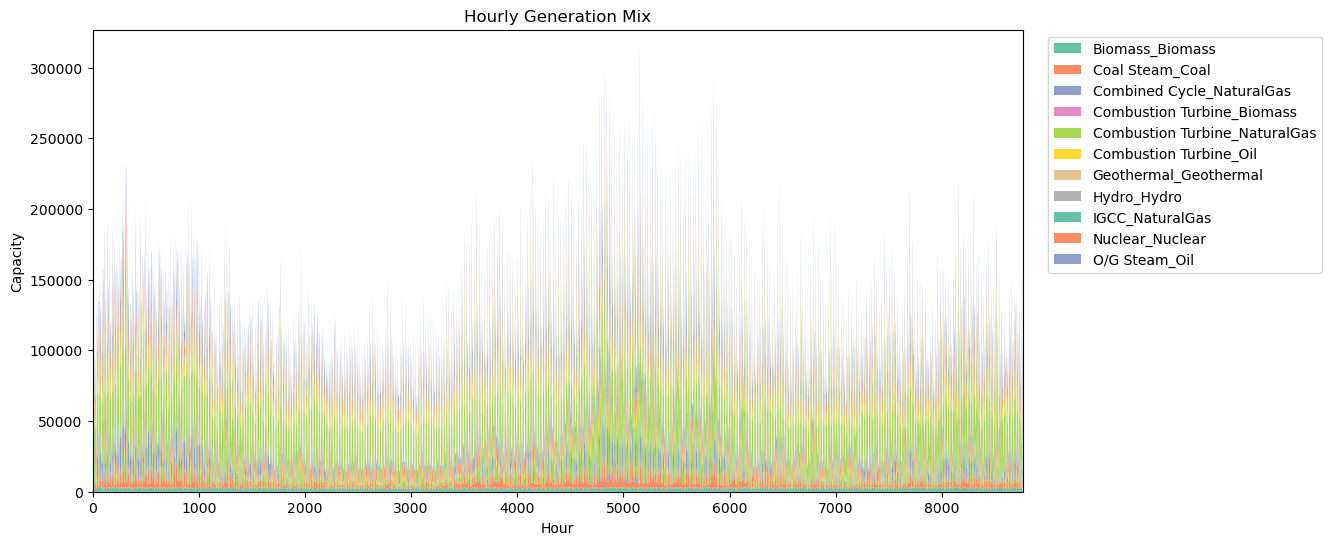

In [6]:
# plot diagnostics
deep_reload(diagnostics)

diagnostics.plot_hourly_gen_mix(hourly_mix)